In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

              unit,na_item,geo\time   Country   2005   2006   2007   2008  \
0   PC_EU27_2020_MPPS_CP,NLPR_HW,AT   Austria  117.5  117.8  116.8  116.3   
1  PC_EU27_2020_MPPS_CP,NLPR_PER,AT   Austria  122.2  121.3  119.5  118.5   
2   PC_EU27_2020_MPPS_CP,NLPR_HW,BE   Belgium  142.8  139.9  138.0  136.2   
3  PC_EU27_2020_MPPS_CP,NLPR_PER,BE   Belgium  133.6  132.1  130.4  127.9   
4   PC_EU27_2020_MPPS_CP,NLPR_HW,BG  Bulgaria   37.6   37.5   38.8   39.5   

    2009   2010   2011   2012   2013   2014   2015   2016   2017   2018  \
0  117.5  115.6  115.1  118.0  117.9  118.1  119.7  119.5  117.5  117.8   
1  118.3  115.7  115.6  118.1  117.4  117.0  117.4  117.8  115.8  116.5   
2  136.8  138.0  134.0  135.2  134.7  136.1  136.8  136.5  134.0  133.5   
3  128.7  130.4  128.0  130.2  130.3  131.5  131.7  130.9  129.6  129.3   
4   40.1   41.9   42.9   44.1   42.9   44.1   44.5   45.8   45.9   47.2   

    2019   2020  Unnamed: 18  
0  115.9  117.4          NaN  
1  115.5  114.5         

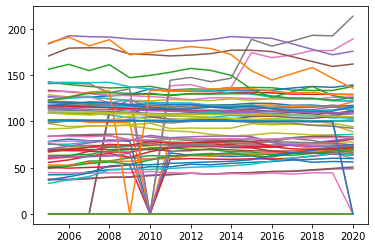

[[ 1.     0.259  0.134  0.511  0.137  0.148  0.41   0.292  0.078  0.019
   0.04   0.131  0.037  0.036 -0.399 -0.405 -0.216 -0.314  0.137  0.052
   0.238  0.247 -0.421 -0.406  0.009]
 [ 0.259  1.     0.712  0.624 -0.823 -0.813 -0.294 -0.456 -0.625 -0.737
  -0.876 -0.817 -0.893 -0.887  0.56   0.508  0.752  0.727  0.801  0.765
   0.592  0.615 -0.488 -0.379 -0.797]
 [ 0.134  0.712  1.     0.674 -0.657 -0.62  -0.721 -0.821 -0.482 -0.531
  -0.582 -0.482 -0.714 -0.708  0.414  0.556  0.809  0.692  0.588  0.625
   0.168  0.166 -0.361 -0.28  -0.733]
 [ 0.511  0.624  0.674  1.    -0.334 -0.339 -0.153 -0.33  -0.439 -0.441
  -0.3   -0.203 -0.456 -0.438 -0.084 -0.093  0.405  0.404  0.566  0.52
   0.065  0.086 -0.555 -0.448 -0.602]
 [ 0.137 -0.823 -0.657 -0.334  1.     0.995  0.556  0.625  0.744  0.865
   0.945  0.888  0.96   0.953 -0.857 -0.807 -0.798 -0.794 -0.61  -0.664
  -0.391 -0.409  0.112  0.001  0.683]
 [ 0.148 -0.813 -0.62  -0.339  0.995  1.     0.523  0.605  0.766  0.883
   0.94   0.892  0.

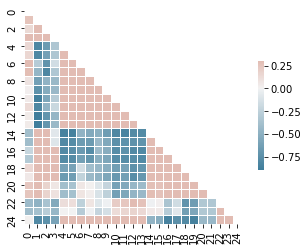

RangeIndex(start=0, stop=38, step=1) RangeIndex(start=0, stop=35, step=1) RangeIndex(start=0, stop=35, step=1)


In [332]:
# %%
#coding utf8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %%
def load_data():
    args = []
    prod_df = pd.read_csv('../data/productivity.csv')
    prod_new_df = pd.read_csv('../data/productivity_new.csv')
    sentiment_df = pd.read_csv('../data/sentiment.csv')
    hours_worked_df = pd.read_csv('../data/lfsa_ewhun2_1_Data.csv')
    productivity_df = pd.read_csv('../data/GDP_per_quarter.csv') 
    unem_df = pd.read_csv('../data/unem.csv')
    covid_df = pd.read_csv('../data/DataPerWeek.csv')
    unem_df.fillna(0)
    productivity_df.fillna(0)
    sentiment_df.fillna(0)
    prod_df.fillna(0)
    covid_df.fillna(0)
    args += [prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df]
    return args

# %%
args = load_data()
prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df = args
for i in np.linspace(2005, 2020, 16, endpoint=True):
    prod_df[[str(int(i))]] = prod_df[[str(int(i))]].apply(pd.to_numeric, errors="coerce")
print(prod_df.head(), sentiment_df.head(), hours_worked_df.head(), prod_new_df.head(), productivity_df.head(), unem_df.head(), covid_df.head())

#%%
prod_data = prod_df.iloc[0:71, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float64).T
time_data = np.repeat(np.array([np.linspace(2005, 2020, 16)]).transpose(), 71, 1)
plt.plot(time_data, prod_data)
plt.show()

#%%
corr = np.round(np.corrcoef(prod_df.iloc[0:25, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float16)), 3)
mask = np.triu(np.ones_like(corr, dtype=bool))
print(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#%%
prod_df.head(), productivity_df.head()

#%%
GDP_df = pd.read_excel('../data/GDP_per_quarter_2.xlsx', sheet_name='Sheet 1')
HW_df = pd.read_excel('../data/hours_worked.xlsx', sheet_name='Sheet 1')
employees_df = pd.read_excel('../data/Employees.xlsx', sheet_name='Sheet 1')
print(GDP_df.index, HW_df.index, employees_df.index)
GDP_df = GDP_df.loc[:, ~GDP_df.columns.str.contains('^Unnamed')]
HW_df = HW_df.loc[:, ~HW_df.columns.str.contains('^Unnamed')]
employees_df = employees_df.loc[:, ~employees_df.columns.str.contains('^Unnamed')]
GDP_df.replace(':', np.nan, inplace=True)
HW_df.replace(':', np.nan, inplace=True)
employees_df.replace(':', np.nan, inplace=True)
GDP_df.interpolate(method='linear', inplace=True)
HW_df.interpolate(method='linear', inplace=True)
employees_df.interpolate(method='linear', inplace=True)

def create_per_employeer(GDP_df, HW_df, employees_df):
    ''' This is a function to create a dataframe with the per-employee GDP and per hour worked '''
    cols =(list(set(GDP_df.columns) and set(employees_df.columns) and set(HW_df.columns)))
    cols.sort()
    idx = cols.pop()
    per_employee_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    for i in cols:
        GDP_df[i] = GDP_df[i].apply(pd.to_numeric, errors="coerce")
        employees_df[i] = employees_df[i].apply(pd.to_numeric, errors="coerce")
        HW_df[i] = HW_df[i].apply(pd.to_numeric, errors="coerce")
        per_employee_df[i] = GDP_df[i]/employees_df[i]
        per_HW = per_employee_df[i]/HW_df[i]
    per_employee_df.index = GDP_df[idx]
    per_HW.index = GDP_df[idx]
    return per_employee_df, per_HW
per_employee_df, per_HW = create_per_employeer(GDP_df, HW_df, employees_df)

#print(per_employee_df.head(), per_HW.head())

In [333]:
inf = pd.read_csv('../data/Quarterly_infilation.csv')
infilation = pd.DataFrame(inf)
infilation_new =infilation.drop(['SUBJECT', 'MEASURE','FREQUENCY','Flag Codes'], axis=1)
infilation_new

,LOCATION,INDICATOR,TIME,Value
0,AUT,CPI,2000-Q1,1.576597
1,AUT,CPI,2000-Q2,2.111587
2,AUT,CPI,2000-Q3,2.858183
3,AUT,CPI,2000-Q4,2.828739
4,AUT,CPI,2001-Q1,2.780696
...,...,...,...,...
2283,LTU,CPI,2020-Q4,0.527013
2284,LTU,CPI,2021-Q1,0.833219
2285,LTU,CPI,2021-Q2,3.235482
2286,LTU,CPI,2021-Q3,5.414587


In [334]:
df = infilation_new.pivot_table('Value', ['LOCATION', 'INDICATOR'], 'TIME')
df

,TIME,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,2002-Q1,2002-Q2,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
LOCATION,INDICATOR,,,,,,,,,,,,,,,,,,,,,
AUT,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,1.965924,1.785135,...,1.394612,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848
BEL,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,2.735005,1.343232,...,1.162466,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534
CHE,CPI,1.563958,1.607336,1.483809,1.579184,1.016693,1.504252,1.025491,0.413834,0.561760,0.689405,...,0.259324,-0.076527,-0.126142,-1.220927,-0.862000,-0.689605,-0.431098,0.494460,0.834255,1.435084
CZE,CPI,3.511303,3.650336,3.902903,4.032258,4.042751,4.958295,5.405406,4.240766,3.841001,2.428256,...,2.836432,3.019818,3.603604,3.113440,3.309838,2.625954,2.188905,2.899851,4.123405,6.129128
DEU,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,1.998463,1.294745,...,1.466837,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284
DNK,CPI,3.132875,3.201980,2.725199,2.561281,2.391700,2.542764,2.396744,2.023252,2.503237,2.258202,...,0.421804,0.683594,0.616883,0.097025,0.516963,0.452635,0.709906,1.647819,1.896496,3.154168
ESP,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,2.503155,3.425096,...,0.312410,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760
EST,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,4.323878,4.175705,...,2.199367,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728
FIN,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,1.964133,1.388619,...,0.947235,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865


In [335]:
df = df.rename({'AUT': 'Austria'})
df = df.rename({'BEL': 'Belgium'})
df = df.rename({'DEU': 'Germany'})
df = df.rename({'ESP': 'Spain'})
df = df.rename({'EST': 'Estonia'})
df = df.rename({'FIN': 'Finland'})
df = df.rename({'FRA': 'France'})
df = df.rename({'GRC': 'Greece'})
df = df.rename({'IRL': 'Ireland'})
df = df.rename({'ITA': 'Italy'})
df = df.rename({'LTU': 'Lithuania'})
df = df.rename({'LUX': 'Luxembourg'})
df = df.rename({'LVA': 'Latvia'})
df = df.rename({'PRT': 'Portugal'})
df = df.rename({'NLD': 'Netherlands'})
df = df.rename({'SVK': 'Slovakia'})
df = df.rename({'SVN': 'Slovenia'})
df = df.rename({'ISL': 'Iceland'})
df = df.rename({'GBR': 'United Kingdom'})
df = df.rename({'CHE': 'Switzerland'})
df = df.rename({'CZE': 'Cezch Republic'})
df = df.rename({'DNK': 'Denmark'})
df = df.rename({'HUN': 'Hungary'})
df = df.rename({'NOR': 'Norway'})
df = df.rename({'POL': 'Poland'})
df = df.rename({'SWE': 'Sweden'})


df.reset_index(inplace=True)
df

TIME,LOCATION,INDICATOR,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
0,Austria,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,...,1.394612,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848
1,Belgium,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,...,1.162466,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534
2,Switzerland,CPI,1.563958,1.607336,1.483809,1.579184,1.016693,1.504252,1.025491,0.413834,...,0.259324,-0.076527,-0.126142,-1.220927,-0.862000,-0.689605,-0.431098,0.494460,0.834255,1.435084
3,Cezch Republic,CPI,3.511303,3.650336,3.902903,4.032258,4.042751,4.958295,5.405406,4.240766,...,2.836432,3.019818,3.603604,3.113440,3.309838,2.625954,2.188905,2.899851,4.123405,6.129128
4,Germany,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,...,1.466837,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284
5,Denmark,CPI,3.132875,3.201980,2.725199,2.561281,2.391700,2.542764,2.396744,2.023252,...,0.421804,0.683594,0.616883,0.097025,0.516963,0.452635,0.709906,1.647819,1.896496,3.154168
6,Spain,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,...,0.312410,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760
7,Estonia,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,...,2.199367,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728
8,Finland,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,...,0.947235,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865
9,France,CPI,1.461752,1.423246,1.903914,1.913168,1.306284,2.050618,1.776798,1.404832,...,1.004443,1.085032,1.193702,0.297001,0.347421,0.076443,0.742843,1.381902,1.724740,2.718014


In [336]:
per_employee_df.reset_index(inplace=True) 


In [337]:
per_employee_df.drop([1,12,17,31,34,35,36,37,32,33,22,10],inplace=True)
per_employee_df.reset_index(inplace=True)

In [338]:
employee = per_employee_df.drop(['index'],axis=1)


In [339]:
per_employee = employee.reindex([15,0,24,1,3,2,7,4,20,8,25,6,13,5,22,9,11,12,10,14,23,16,17,19,18,21])

per_employee.reset_index(inplace = True)



In [340]:
per_emp = per_employee.drop(['index'],axis = 1)
per_emp

,TIME,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
0,Austria,20.687781,21.628591,21.217645,21.898095,20.293193,20.904611,20.888146,22.106489,20.476532,...,25.792943,27.203558,25.357744,24.013843,25.440437,26.405831,24.976529,26.958439,27.039260,10.248132
1,Belgium,22.560757,23.873680,22.491755,23.550260,22.360721,22.862207,22.508576,24.419903,22.760715,...,27.952909,30.597291,28.022432,26.008691,27.708231,30.384407,29.304520,30.463900,29.654032,32.797095
2,Switzerland,6.884095,27.408082,7.063849,7.494373,7.298578,27.840991,7.499795,7.774525,30.186816,...,41.915824,42.535230,41.588114,40.740341,42.282915,42.469272,41.661814,43.846839,44.851171,73.198762
3,Czechia,8.914995,9.921593,10.427240,9.790631,8.334568,9.144258,9.605971,9.819170,9.050971,...,13.357356,13.746098,12.450640,11.763819,12.952916,13.390329,12.561665,14.132169,14.303338,14.758361
4,Germany (until 1990 former territory of the FRG),18.930790,19.091448,18.794552,18.690965,17.799558,17.784520,18.453160,18.579709,18.755646,...,23.326132,23.477178,551.832360,507.064950,554.953666,569.135284,23.361990,23.589302,24.510983,25.027807
5,Denmark,23.352974,24.174315,24.111718,24.406873,23.162066,23.539758,23.785051,25.332092,24.460992,...,29.873202,31.011000,30.193802,29.834972,30.970074,32.141322,31.078993,32.465440,32.320438,34.123543
6,Spain,15.807677,16.790067,16.006881,17.463114,16.201118,17.155542,16.493534,17.778941,16.704689,...,18.316183,19.365798,17.596664,16.291273,17.654726,18.580803,17.520152,18.331867,17.735874,19.482595
7,Estonia,6.747880,7.538948,7.210105,7.013278,6.380381,6.795442,6.611883,7.125941,6.808112,...,12.533702,12.890639,11.387154,11.943073,12.585698,13.172993,12.172828,13.722078,14.346965,15.535682
8,Finland,21.551820,22.103757,21.695812,23.180999,20.820281,21.243420,21.047427,23.069153,21.363237,...,26.809267,28.914940,27.085462,26.812793,27.067125,29.418447,27.848168,28.912486,28.942959,31.504026
9,France,21.562387,21.791431,20.979927,21.850713,21.067751,21.101674,20.649842,22.141235,21.589493,...,25.455131,26.440734,24.657022,22.663525,24.956282,26.081403,25.431133,25.650639,25.587892,27.009519


In [341]:
per_emp['Average_Productivity']=per_emp.iloc[:,1:56].mean(axis=1,skipna=True)
per_emp

,TIME,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,...,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,Average_Productivity
0,Austria,20.687781,21.628591,21.217645,21.898095,20.293193,20.904611,20.888146,22.106489,20.476532,...,27.203558,25.357744,24.013843,25.440437,26.405831,24.976529,26.958439,27.039260,10.248132,23.651332
1,Belgium,22.560757,23.873680,22.491755,23.550260,22.360721,22.862207,22.508576,24.419903,22.760715,...,30.597291,28.022432,26.008691,27.708231,30.384407,29.304520,30.463900,29.654032,32.797095,26.278030
2,Switzerland,6.884095,27.408082,7.063849,7.494373,7.298578,27.840991,7.499795,7.774525,30.186816,...,42.535230,41.588114,40.740341,42.282915,42.469272,41.661814,43.846839,44.851171,73.198762,35.153224
3,Czechia,8.914995,9.921593,10.427240,9.790631,8.334568,9.144258,9.605971,9.819170,9.050971,...,13.746098,12.450640,11.763819,12.952916,13.390329,12.561665,14.132169,14.303338,14.758361,10.912840
4,Germany (until 1990 former territory of the FRG),18.930790,19.091448,18.794552,18.690965,17.799558,17.784520,18.453160,18.579709,18.755646,...,23.477178,551.832360,507.064950,554.953666,569.135284,23.361990,23.589302,24.510983,25.027807,59.075739
5,Denmark,23.352974,24.174315,24.111718,24.406873,23.162066,23.539758,23.785051,25.332092,24.460992,...,31.011000,30.193802,29.834972,30.970074,32.141322,31.078993,32.465440,32.320438,34.123543,27.934209
6,Spain,15.807677,16.790067,16.006881,17.463114,16.201118,17.155542,16.493534,17.778941,16.704689,...,19.365798,17.596664,16.291273,17.654726,18.580803,17.520152,18.331867,17.735874,19.482595,17.872432
7,Estonia,6.747880,7.538948,7.210105,7.013278,6.380381,6.795442,6.611883,7.125941,6.808112,...,12.890639,11.387154,11.943073,12.585698,13.172993,12.172828,13.722078,14.346965,15.535682,9.564065
8,Finland,21.551820,22.103757,21.695812,23.180999,20.820281,21.243420,21.047427,23.069153,21.363237,...,28.914940,27.085462,26.812793,27.067125,29.418447,27.848168,28.912486,28.942959,31.504026,25.021848
9,France,21.562387,21.791431,20.979927,21.850713,21.067751,21.101674,20.649842,22.141235,21.589493,...,26.440734,24.657022,22.663525,24.956282,26.081403,25.431133,25.650639,25.587892,27.009519,23.533719


In [342]:
df['Average_Infilation'] = df.iloc[:,32:87].mean(axis=1,skipna=True)
df

TIME,LOCATION,INDICATOR,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,...,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,Average_Infilation
0,Austria,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,...,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848,1.841107
1,Belgium,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,...,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534,1.783390
2,Switzerland,CPI,1.563958,1.607336,1.483809,1.579184,1.016693,1.504252,1.025491,0.413834,...,-0.076527,-0.126142,-1.220927,-0.862000,-0.689605,-0.431098,0.494460,0.834255,1.435084,0.141880
3,Cezch Republic,CPI,3.511303,3.650336,3.902903,4.032258,4.042751,4.958295,5.405406,4.240766,...,3.019818,3.603604,3.113440,3.309838,2.625954,2.188905,2.899851,4.123405,6.129128,2.172732
4,Germany,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,...,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284,1.340088
5,Denmark,CPI,3.132875,3.201980,2.725199,2.561281,2.391700,2.542764,2.396744,2.023252,...,0.683594,0.616883,0.097025,0.516963,0.452635,0.709906,1.647819,1.896496,3.154168,1.337453
6,Spain,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,...,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760,1.276538
7,Estonia,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,...,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728,2.713651
8,Finland,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,...,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865,1.372989
9,France,CPI,1.461752,1.423246,1.903914,1.913168,1.306284,2.050618,1.776798,1.404832,...,1.085032,1.193702,0.297001,0.347421,0.076443,0.742843,1.381902,1.724740,2.718014,1.138573


In [343]:
correl_signif = pearsonr(per_emp['Average_Productivity'], df['Average_Infilation'])
correl = correl_signif[0]
correl

-0.35298283100855354